<a href="https://colab.research.google.com/github/zhukuixi/AshenOne/blob/master/fastai_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai

     |████████████████████████████████| 225 kB 5.0 MB/s 


In [11]:
from google.colab import drive
from fastai.vision.all import *
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Download images of cat and dog 

In [ ]:
from fastcore.all import *
import time

def search_images(term, max_images=200):
    # This function serves to get url of images from duckduckgo.com based on the keyword "term"
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

Set up the data folder and download one photo for cat and dog respectively


In [ ]:
path = Path("/content/drive/MyDrive/fastbook/jooCode/lesson1/data/")
path.mkdir(exist_ok=True, parents=True)
os.chdir("/content/drive/MyDrive/fastbook/jooCode/lesson1/data/")


In [ ]:
os.getcwd()

'/content/drive/MyDrive/fastbook/jooCode/lesson1/data'

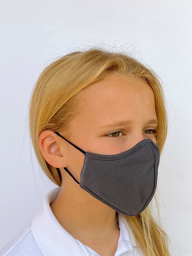

In [ ]:
from fastdownload import download_url

download_url(search_images('face mask', max_images=1)[0],'MASK.jpg',show_progress=False)
from fastai.vision.all import *
im = Image.open('MASK.jpg')
im.to_thumb(256,256)

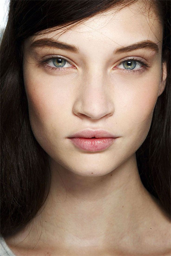

In [ ]:
download_url(search_images('face', max_images=1)[0], 'NOMASK.jpg', show_progress=False)
Image.open('NOMASK.jpg').to_thumb(256,256)

1.Downloading image data for cat and dogs. 

2.Resize the image data.

In [ ]:
searches = 'face mask','face'
downloadpath = Path('mask_vs_nomask')
resizePath = Path('mask_vs_nomask_Resize')
for o in searches:
    destDownload = (downloadpath/o)
    destResize = (resizePath/o)
    destDownload.mkdir(exist_ok=True, parents=True)
    destResize.mkdir(exist_ok=True, parents=True)
    download_images(destDownload, urls=search_images(f'{o}'))
    resize_images(destDownload, max_size=400, dest=destResize)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


# Step2: Train the Model

Verify if any images cannot be open and remove these images.

In [13]:
path = Path("/content/drive/MyDrive/fastbook/jooCode/lesson1/data/mask_vs_nomask_Resize")
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

**DataBlock**  
* define block  
* define getter (get_items,get_y..)  
* define splitter  
* define transform (item_tfms, batch_tfms..)  


Reference: https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0/blob/master/Computer%20Vision/01_Slides.pdf

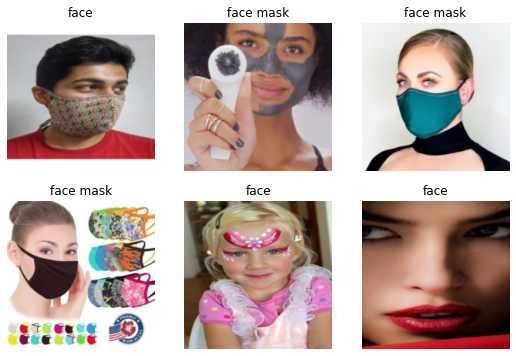

In [20]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [38]:
?DataBlock.new

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.066303,0.532480,0.191781,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.769370,0.597917,0.219178,00:02
1,0.579264,0.727142,0.232877,00:02
2,0.451853,0.845831,0.246575,00:02
3,0.381682,0.864676,0.232877,00:03
4,0.320930,0.826300,0.232877,00:02


In [19]:
learn.dls.vocab

['face', 'face mask']

In [ ]:
label,_,probs = learn.predict(PILImage.create('MASK.jpg'))
print(f"This is a: {label}.")
print(f"Probability it's a FACE: {probs[0]:.4f}")

This is a: face mask.
Probability it's a FACE: 0.0013


In [39]:
label,_,probs = learn.predict(PILImage.create('NOMASK.jpg'))
print(f"This is a: {label}.")
print(f"Probability it's a FACE: {probs[0]:.4f}")

This is a: face.
Probability it's a FACE: 0.9992


In [47]:
from ipywidgets import *

In [52]:
a = widgets.FileUpload()

In [53]:
a

FileUpload(value={}, description='Upload')